# Description

TODO

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(273, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.225462,0.010357,0.350445,0.236081,0.054698,0.322846,0.238314,0.056364,0.322127
1,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0.225381,0.010368,0.350167,0.232825,0.059509,0.304760,0.237129,0.063543,0.303123
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.161708,0.063624,0.183089,0.230107,0.183277,0.117991,0.234523,0.187130,0.117597
3,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.234826,0.013491,0.352296,0.250994,0.074993,0.303274,0.256369,0.079998,0.301111
4,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6,0.172859,0.061933,0.193501,0.248806,0.193558,0.134298,0.255571,0.200307,0.132916


# Explore best partition per k

## ARI

In [8]:
_col0, _col1 = "ari_mean", "ari_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ari_mean,ari_median
k,,,,,
10,86,scc_020,10,0.262150,0.028646
9,85,scc_020,9,0.262150,0.028642
11,87,scc_020,11,0.262147,0.028651
8,84,scc_020,8,0.262116,0.028943
7,83,scc_020,7,0.262115,0.028936
5,42,eac_average_coassoc_matrix,5,0.260519,0.032744
4,41,eac_average_coassoc_matrix,4,0.260508,0.032736
13,89,scc_020,13,0.257327,0.030529
6,238,eac_single_coassoc_matrix,6,0.254424,0.024557


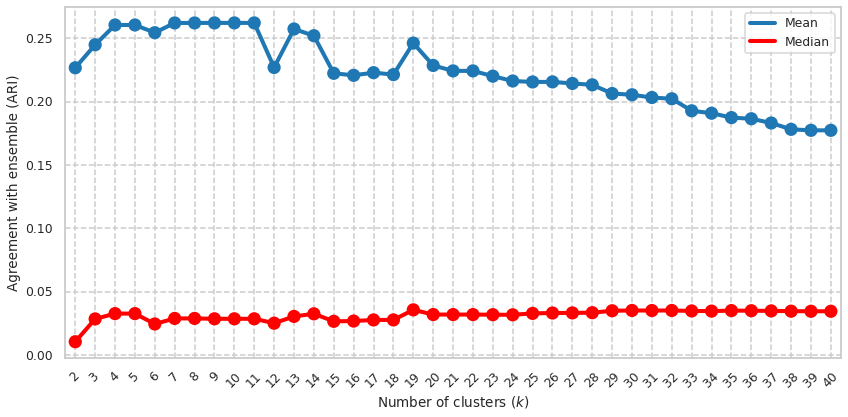

In [9]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (ARI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

## NMI

In [10]:
_col0, _col1 = "nmi_mean", "nmi_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,nmi_mean,nmi_median
k,,,,,
11,87,scc_020,11,0.311515,0.145148
36,112,scc_020,36,0.311241,0.309628
10,86,scc_020,10,0.310874,0.143378
9,85,scc_020,9,0.309836,0.141984
13,89,scc_020,13,0.309749,0.154324
31,224,scc_025,31,0.308936,0.302297
19,95,scc_020,19,0.308186,0.176455
8,84,scc_020,8,0.308122,0.140530
14,90,scc_020,14,0.307700,0.161859


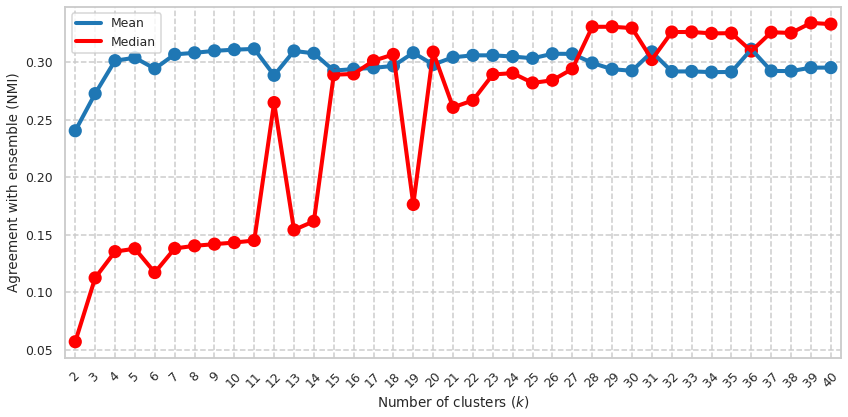

In [11]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (NMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

## AMI

In [12]:
_col0, _col1 = "ami_mean", "ami_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ami_mean,ami_median
k,,,,,
11,87,scc_020,11,0.301837,0.135451
10,86,scc_020,10,0.301736,0.134304
9,85,scc_020,9,0.301299,0.133668
8,84,scc_020,8,0.300169,0.133086
7,83,scc_020,7,0.299448,0.131352
13,89,scc_020,13,0.298894,0.142181
5,42,eac_average_coassoc_matrix,5,0.298287,0.132804
4,41,eac_average_coassoc_matrix,4,0.296430,0.131213
14,90,scc_020,14,0.296078,0.150176


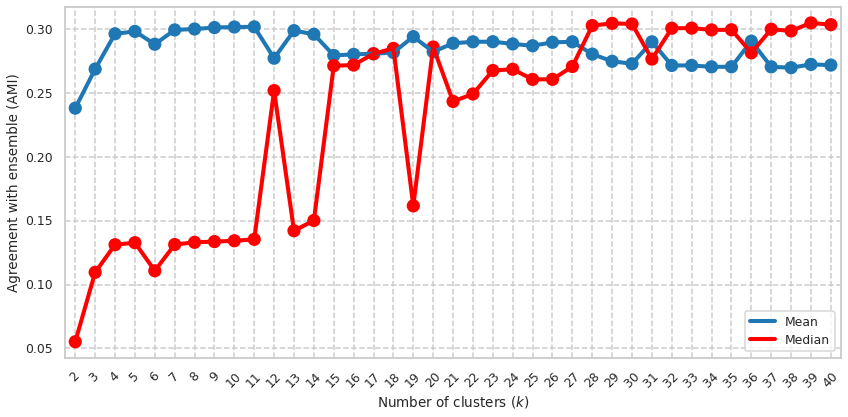

In [13]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

**TODO: THIS NEEDS TO BE UPDATED**

**It is interesting to see that:**
1. AMI values (an adjusted-for-chance index) very similar to NMI (not adjusted-for-chance).
1. All measures coincide that a `k` around 4 or 5 gives the maximum agreement with the ensemble.
1. For ARI, partitions with more clusters have a smaller agreement with the ensemble, which is expected. This is not the case with AMI and NMI.

**I will use ARI in the next analysis.**

# Select best partition per k

In [14]:
_measure_col = "ami_mean"
best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [15]:
best_parts = best_parts.set_index("k")

In [16]:
best_parts.shape

(39, 3)

In [17]:
# show partitions with top ARI
best_parts.head(10)

,method,partition,ami_mean
k,,,
11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448
13,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298894
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298287
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.296430
14,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.296078


In [18]:
best_parts.sort_values("k")

,method,partition,ami_mean
k,,,
2,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.238194
3,eac_complete_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.268836
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.296430
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.298287
6,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.288249
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736


## Save best partitions per k

In [19]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [20]:
best_parts.to_pickle(output_file)